# **Data content - Analysis of sellers and products**

In this file, there will be an analysis of sellers and products done.

There are 4 tables which will be considered. They include information as per below:



*   **Sellers**: seller_id, seller_zip_code_prefix, seller_city, seller_state;
*   **Order_items**: order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_val;
*   **Orders**: order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date;
*   **Products**: product_id, product_category_item, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm.

To prepare analysis, above data will be merged and based on this conclusions and observations will be made.

Primarily, each file will be considered separately, finally they will be merged.



# **Installation and imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Analysis of Orders data**

In [ ]:
# Load orders data and parse columns with dates
orders = pd.read_csv("gdrive/My Drive/Task 2/orders.csv", parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

In [ ]:
# Shape of data
orders.shape

(99441, 8)

In [ ]:
# First 5 rows of data
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [ ]:
# Data types - 3 object and 5 datetime
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [ ]:
# Amount of unique values in each column
print(orders.nunique())

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64


In [ ]:
# Check for duplicated rows - no duplicates
duplicate = orders[orders.duplicated()]
duplicate

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [ ]:
# Data info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
# Check for null values (null values occur for columns order_approved_at, order_delivered_carrier_date, order_delivered_customer_date - insignificant amount)
print(orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [ ]:
# Simplify the column names
orders.columns = (['order_id', 'customer_id', 'order_status', 'order_purchase', 'order_approved', 'order_carrier', 'order_customer', 'order_delivery'])

In [ ]:
# Reduce the memory thanks to changing the type of columns from object to categorical (order_status column)
orders['order_status'] = orders['order_status'].astype('category')

In [ ]:
# Check the info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        99441 non-null  object        
 1   customer_id     99441 non-null  object        
 2   order_status    99441 non-null  category      
 3   order_purchase  99441 non-null  datetime64[ns]
 4   order_approved  99281 non-null  datetime64[ns]
 5   order_carrier   97658 non-null  datetime64[ns]
 6   order_customer  96476 non-null  datetime64[ns]
 7   order_delivery  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [ ]:
# Statistics for categorical data
print(orders.describe(include = 'category').T)

              count unique        top   freq
order_status  99441      8  delivered  96478


In [ ]:
# Replace null values in each column by 'No data'
orders = orders.replace(np.nan, 'No data')

In [ ]:
# Check if null values still appear - they do not
null_data = orders[orders.isnull().any(axis=1)]
null_data

,order_id,customer_id,order_status,order_purchase,order_approved,order_carrier,order_customer,order_delivery


In [ ]:
# Unique values for order_status column
orders['order_status'].unique()

['delivered', 'invoiced', 'shipped', 'processing', 'unavailable', 'canceled', 'created', 'approved']
Categories (8, object): ['approved', 'canceled', 'created', 'delivered', 'invoiced', 'processing',
                         'shipped', 'unavailable']

In [ ]:
# Group by order_status column - the most orders have status delivered, the least - approved and created
occur = orders.groupby(['order_status'], as_index=False).size()
by_status = pd.DataFrame(occur)
print(by_status)

  order_status   size
0     approved      2
1     canceled    625
2      created      5
3    delivered  96478
4     invoiced    314
5   processing    301
6      shipped   1107
7  unavailable    609


# **Analysis of Order_items data**

In [ ]:
# Load items data and parse column with date
items = pd.read_csv("gdrive/My Drive/Task 2/order_items.csv", parse_dates=['shipping_limit_date'])

In [ ]:
# Shape of data
items.shape

(112650, 7)

In [ ]:
# First 5 rows of data
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# Data types - 3 numerical, 3 object, 1 datetime
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [ ]:
# Unique value in each column
print(items.nunique())

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64


In [ ]:
# Check for duplicated rows - no duplicates
duplicate = items[items.duplicated()]
duplicate

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [ ]:
# Data info
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
# Check for null values - no null values
print(items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


# **Analysis for Products data**

In [ ]:
# Load products data
products = pd.read_csv("gdrive/My Drive/Task 2/products.csv")

In [ ]:
# Shape of data
products.shape

(32951, 9)

In [ ]:
# First 5 rows of data
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Data types - 7 numerical and 2 object
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [ ]:
# Unique values in each column
print(products.nunique())

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64


In [ ]:
# Check for duplicated rows - no duplicates
duplicate = products[products.duplicated()]
duplicate

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [ ]:
# Data info
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# Check for null values - no significant amount
print(products.isnull().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [ ]:
# Rows with missing values will be dropped
products = products.dropna(axis = 0)

In [ ]:
# Check if missing values still appear - they do not
print(products.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [ ]:
# Column product_category_name consist of non-English items.
# They will be translated thanks to additional table product_category_name_translation.
# Load category data
category = pd.read_csv("gdrive/My Drive/Task 2/product_category_name_translation.csv")
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# Check for null values - no null values
print(category.isnull().sum())

product_category_name            0
product_category_name_english    0
dtype: int64


In [ ]:
# Merge product and category tables on product_category_name column
pro = pd.merge(products, category, on='product_category_name')
pro.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [ ]:
# Check for null values - no null values
print(pro.isnull().sum())

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64


In [ ]:
# Drop column with non-English product_category_name
pro.drop(['product_category_name'], axis=1, inplace=True)
pro.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [ ]:
# Simplify the column names
pro.columns = (['product_id', 'product_name_len', 'product_des_len', 'product_photos_qty', 'product_weight', 'product_length', 'product_height', 'product_width', 'product_name'])

# **Analysis for Sellers Data**


In [ ]:
# Load sellers data
sellers = pd.read_csv("gdrive/My Drive/Task 2/sellers.csv")

In [ ]:
# Shape of data
sellers.shape

(3095, 4)

In [ ]:
# First 5 rows of data
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
# Data types - 1 numerical and 3 object
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [ ]:
# Unique value in each column
print(sellers.nunique())

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64


In [ ]:
# Check for duplicated rows - no duplicates
duplicate = sellers[sellers.duplicated()]
duplicate

,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [ ]:
# Data info
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# Check for null values - no null positions
print(sellers.isnull().sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [ ]:
# Simplify the column names
sellers.columns = (['seller_id', 'seller_zip', 'seller_city', 'seller_state'])

# **Merge data into one Dataframe**

In [ ]:
# Merge tables with Order_items and Orders on order_id column
items_orders = pd.merge(items, orders, on='order_id', how='left')
items_orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase,order_approved,order_carrier,order_customer,order_delivery
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [ ]:
# Shape of data
items_orders.shape

(112650, 14)

In [ ]:
# Check whether null values exist - no nulls
print(len(items_orders[items_orders.isna().any(axis=1)]))

0


In [ ]:
# Merge table Products with Items_orders on product_id column
items_orders_products = pd.merge(items_orders, pro, on='product_id', how='left')
items_orders_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase,...,order_customer,order_delivery,product_name_len,product_des_len,product_photos_qty,product_weight,product_length,product_height,product_width,product_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [ ]:
# Shape of data
items_orders_products.shape

(112650, 22)

In [ ]:
# Check whether null values exist
print(len(items_orders_products[items_orders_products.isna().any(axis=1)]))

1628


In [ ]:
# Drop rows with missing values
items_orders_products = items_orders_products.dropna()
items_orders_products = items_orders_products.reset_index(drop=True)
items_orders_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase,...,order_customer,order_delivery,product_name_len,product_des_len,product_photos_qty,product_weight,product_length,product_height,product_width,product_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [ ]:
# Check whether null values exist
print(len(items_orders_products[items_orders_products.isna().any(axis=1)]))

0


In [ ]:
# Merge table Sellers with Items_orders_products on seller_id column
df = pd.merge(items_orders_products, sellers, on='seller_id', how='left')
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase,...,product_des_len,product_photos_qty,product_weight,product_length,product_height,product_width,product_name,seller_zip,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,87900,loanda,PR


In [ ]:
# Shape of data
df.shape

(111022, 25)

In [ ]:
# Check whether null values exist - no null values
print(len(df[df.isna().any(axis=1)]))

0


In [ ]:
# Column names for overall table
print(df.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase', 'order_approved', 'order_carrier',
       'order_customer', 'order_delivery', 'product_name_len',
       'product_des_len', 'product_photos_qty', 'product_weight',
       'product_length', 'product_height', 'product_width', 'product_name',
       'seller_zip', 'seller_city', 'seller_state'],
      dtype='object')


# **Question 1**

## What are the sellers with the biggest/smallest turnover?

In [ ]:
# Create new table with relevant data for the question
q1 = df[['seller_id', 'seller_city', 'seller_state', 'order_id', 'order_item_id', 'product_id', 'price', 'product_name']]
q1.head()

,seller_id,seller_city,seller_state,order_id,order_item_id,product_id,price,product_name
0,48436dade18ac8b2bce089ec2a041202,volta redonda,SP,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff
1,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,SP,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop
2,5b51032eddd242adc84c38acab88f23d,borda da mata,MG,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,furniture_decor
3,9d7a1d34a5052409006425275ba1c2b4,franca,SP,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,perfumery
4,df560393f3a51e74553ab94004ba5c87,loanda,PR,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,garden_tools


In [ ]:
# Group seller by city aggregated by sum of prices
group_seller_id = q1[['price']].groupby([q1['seller_id']]).agg(sum=('price', 'sum')).reset_index()
group_seller_id

,seller_id,sum
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03
2,001e6ad469a905060d959994f1b41e4f,250.00
3,002100f778ceb8431b7a1020ff7ab48f,1234.50
4,004c9cd9d87a3c30c522c48c4fc07416,17841.69
...,...,...
3028,ffcfefa19b08742c5d315f2791395ee5,69.90
3029,ffdd9f82b9a447f6f8d4b91554cc7dd3,2101.20
3030,ffeee66ac5d5a62fe688b9d26f83f534,1839.86
3031,fffd5413c0700ac820c7069d66d98c89,9062.30


In [ ]:
# Sorted by sum descending
sorted = group_seller_id.sort_values(['sum'], ascending=False)
sorted_top = sorted.head()
sorted_top

,seller_id,sum
841,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
995,53243585a1d6dc2643021fd1853d8905,222776.05
865,4a3ca9315b744ce9f8e9374361493884,200472.92
2963,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
1502,7c67e1448b00f6e969d365cea6b010ab,187923.89


In [ ]:
sorted_last = sorted.tail()
sorted_last

,seller_id,sum
2045,ad14615bdd492b01b0d97922e87cb87f,8.25
616,34aefe746cd81b7f3b23253ea28bef39,8.00
365,1fa2d3def6adfa70e58c276bb64fe5bb,6.90
1434,77128dec4bec4878c37ab7d6169d6f26,6.50
2467,cf6f6bc4df3999b9c6440f124fb2f687,3.50


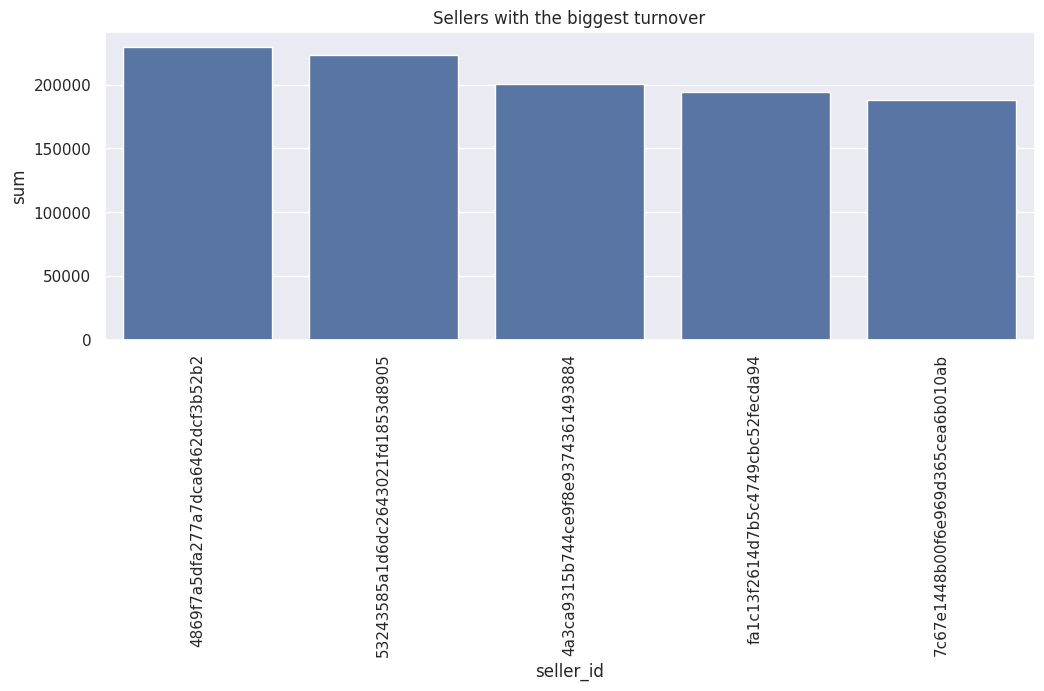

In [ ]:
# Barplot with sellers id with the biggest turnover - there is no significant difference between top 5 sellers
sns.set(rc={"figure.figsize":(12, 4)})
g = sns.barplot(data=sorted_top, y='sum', x='seller_id')
plt.title('Sellers with the biggest turnover')
plt.xticks(rotation=90)
plt.show(g)

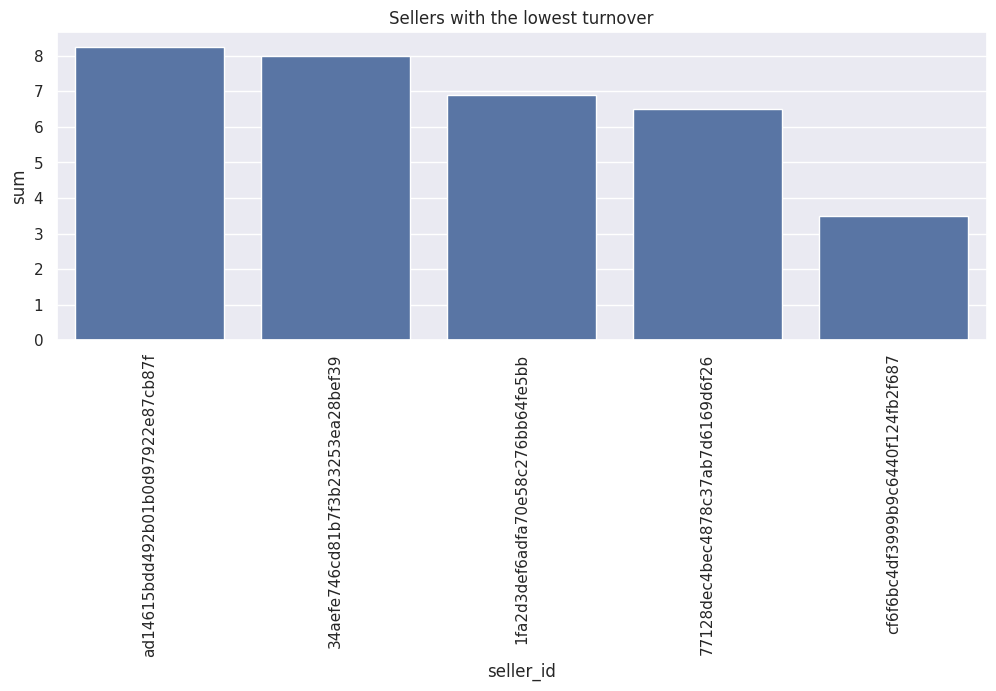

In [ ]:
# Barplot with sellers id with the lowest turnover - there is no significant difference between those sellers
sns.set(rc={"figure.figsize":(12, 4)})
g = sns.barplot(data=sorted_last, y='sum', x='seller_id')
plt.title('Sellers with the lowest turnover')
plt.xticks(rotation=90)
plt.show(g)

# **Question 2**

## What are the leaders/outsiders in sales in each area?

In [ ]:
# Create new table with relevant data for the question
q2 = df[['seller_id', 'seller_city', 'seller_state', 'order_id', 'order_item_id', 'product_id', 'price', 'product_name']]
q2.head()

,seller_id,seller_city,seller_state,order_id,order_item_id,product_id,price,product_name
0,48436dade18ac8b2bce089ec2a041202,volta redonda,SP,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff
1,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,SP,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop
2,5b51032eddd242adc84c38acab88f23d,borda da mata,MG,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,furniture_decor
3,9d7a1d34a5052409006425275ba1c2b4,franca,SP,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,perfumery
4,df560393f3a51e74553ab94004ba5c87,loanda,PR,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,garden_tools


In [ ]:
# Group seller by city aggregated by sum of prices
group_seller_city = q2[['price']].groupby([q2['seller_city']]).agg(sum=('price', 'sum')).reset_index()
group_seller_city

,seller_city,sum
0,04482255,399.90
1,abadia de goias,142.47
2,afonso claudio,293.99
3,aguas claras df,35.00
4,alambari,138.60
...,...,...
599,volta redonda,12954.79
600,votorantim,20056.34
601,votuporanga,21037.57
602,xanxere,2297.05


In [ ]:
# Sorted by sum descending
sorted = group_seller_city.sort_values(['sum'], ascending=False)
sorted_top = sorted.head()
sorted_top

,seller_city,sum
511,sao paulo,2673549.42
225,ibitinga,622324.13
158,curitiba,460364.27
444,rio de janeiro,345923.02
219,guarulhos,279139.81


In [ ]:
sorted_last = sorted.tail()
sorted_last

,seller_city,sum
433,resende,19.99
186,floranopolis,19.98
277,jarinu,14.63
308,macatuba,13.00
378,palotina,9.99


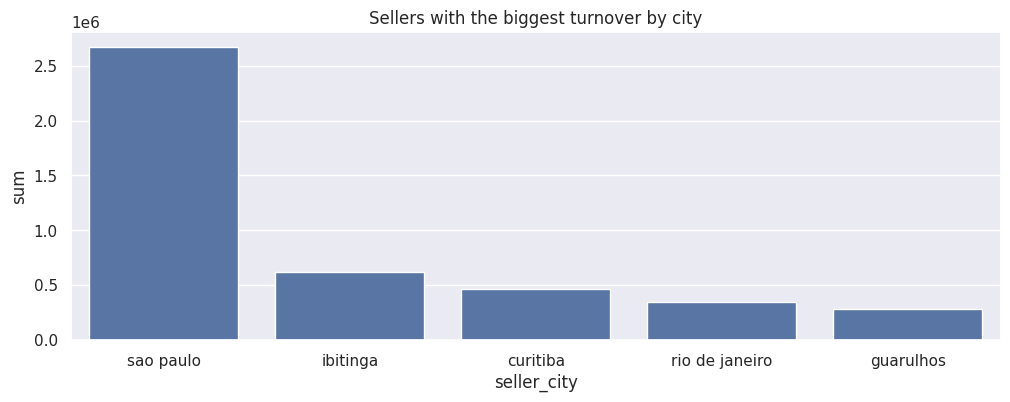

In [ ]:
# Barplot with sellers with the biggest turnover by city - the biggest has Sao Paulo, then Ibitinga and Curitiba
sns.set(rc={"figure.figsize":(12, 4)})
g = sns.barplot(data=sorted_top, y='sum', x='seller_city')
plt.title('Sellers with the biggest turnover by city')
plt.show(g)

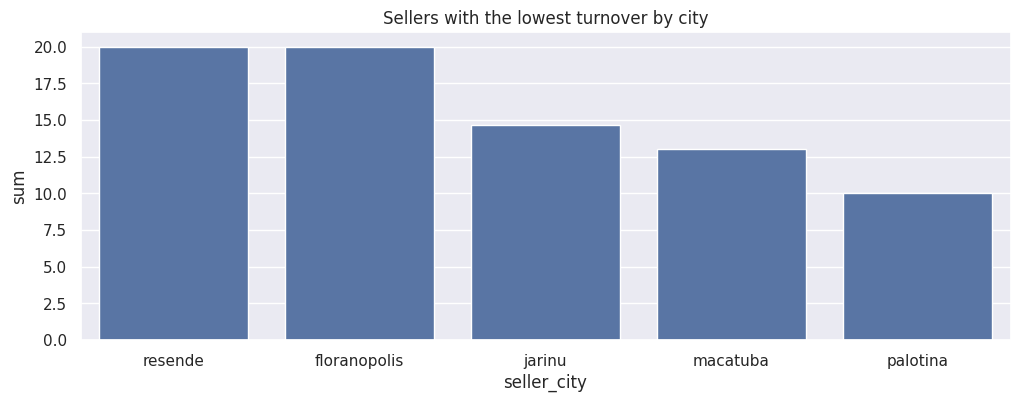

In [ ]:
# Barplot with sellers with the lowest turnover by city - the lowest has Macatuba and Palotina
sns.set(rc={"figure.figsize":(12, 4)})
g = sns.barplot(data=sorted_last, y='sum', x='seller_city')
plt.title('Sellers with the lowest turnover by city')
plt.show(g)

In [ ]:
# Group sellers by state aggregated by sum of prices
group_seller_state = q2[['price']].groupby([q2['seller_state']]).agg(sum=('price', 'sum')).reset_index()
group_seller_state

,seller_state,sum
0,AC,267.00
1,AM,1177.00
2,BA,285561.56
3,CE,20240.64
4,DF,96113.07
5,ES,46534.53
6,GO,64909.01
7,MA,36408.95
8,MG,995429.40
9,MS,8551.69


In [ ]:
# Sorted by sum descending
sorted = group_seller_state.sort_values(['sum'], ascending=False)
sorted

,seller_state,sum
22,SP,8623303.81
15,PR,1245232.28
8,MG,995429.40
16,RJ,830977.66
20,SC,630963.75
19,RS,373667.01
2,BA,285561.56
4,DF,96113.07
13,PE,91493.85
6,GO,64909.01


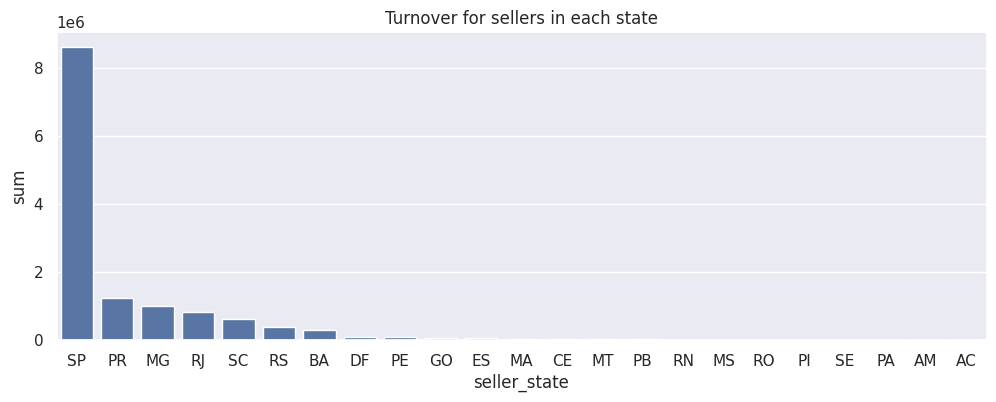

In [ ]:
# Barplot with sellers turnovers by state - the biggest from state SP and PR, the lowest from state AM and AC
sns.set(rc={"figure.figsize":(12, 4)})
g = sns.barplot(data=sorted, y='sum', x='seller_state')
plt.title('Turnover for sellers in each state')
plt.show(g)

# **Question 3**

## Which products sell best in each category?

In [ ]:
# Create new table with relevant data for the question
q3 = df[['product_name', 'price', 'product_id']]
q3.head()

,product_name,price,product_id
0,cool_stuff,58.90,4244733e06e7ecb4970a6e2683c13e61
1,pet_shop,239.90,e5f2d52b802189ee658865ca93d83a8f
2,furniture_decor,199.00,c777355d18b72b67abbeef9df44fd0fd
3,perfumery,12.99,7634da152a4610f1595efa32f14722fc
4,garden_tools,199.90,ac6c3623068f30de03045865e4e10089


In [ ]:
print(len(q3['product_name'].unique()))

71


In [ ]:
# Group products by product category name and id aggregated by their count
group_product_name_id = q3[['price', 'product_id']].groupby([q3['product_name'], q3['product_id']]).agg(count=('product_id', 'count')).reset_index()
df1 = group_product_name_id.sort_values(['count'], ascending=False)
df1.head()

,product_name,product_id,count
14153,furniture_decor,aca2eb7d00ea1a7b8ebd4e68314663af,527
5001,bed_bath_table,99a4788cb24856965c36a24e339b6058,488
15386,garden_tools,422879e10f46682990de24d770e7f83d,484
15355,garden_tools,389d119b48cf3043d311335e499d9c6b,392
15343,garden_tools,368c6c730842d78016ad823897a372db,388


In [ ]:
# Product categories with amount of sold products
df2 = df1[['product_name', 'count']].groupby(df1['product_name'])['count'].max().reset_index()
df3 = df2.sort_values(['count'], ascending=False)

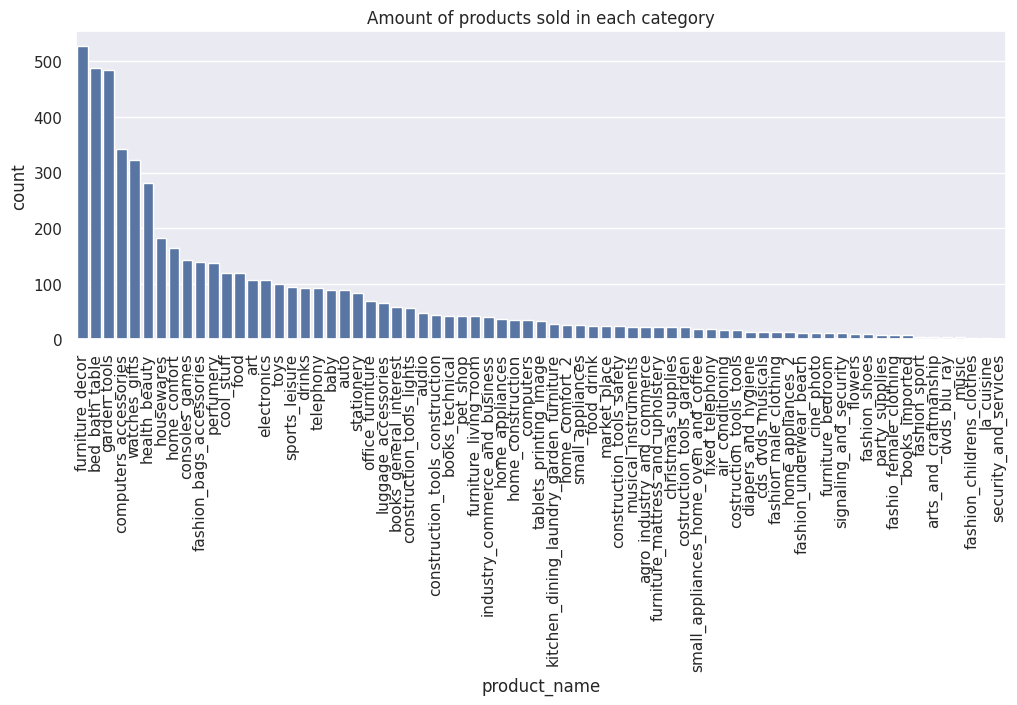

In [ ]:
# Barplot with amount of products sold in each category - the most for furniture_decor and bed bath table, the least for cusine and security
sns.set(rc={"figure.figsize":(12, 4)})
g = sns.barplot(data=df3, y='count', x='product_name')
plt.title('Amount of products sold in each category')
plt.xticks(rotation=90)
plt.show(g)

# **Question 4**

## What is the dependence of product weight on turnover and price?

In [ ]:
# Create new table with relevant data for the question
q4 = df[['product_id', 'price', 'product_weight']]
q4.head()

,product_id,price,product_weight
0,4244733e06e7ecb4970a6e2683c13e61,58.90,650.0
1,e5f2d52b802189ee658865ca93d83a8f,239.90,30000.0
2,c777355d18b72b67abbeef9df44fd0fd,199.00,3050.0
3,7634da152a4610f1595efa32f14722fc,12.99,200.0
4,ac6c3623068f30de03045865e4e10089,199.90,3750.0


In [ ]:
# Group products by product id and aggregate by their count
group_product_id = q4[['price', 'product_id']].groupby([q4['product_id'], q4['price'], q4['product_weight']]).agg(count=('product_id', 'count')).reset_index()
group_product_id

,product_id,price,product_weight,count
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,300.0,1
1,00088930e925c41fd95ebfe695fd2655,129.90,1225.0,1
2,0009406fd7479715e4bef61dd91f2462,229.00,300.0,1
3,000b8f95fcb9e0096488278317764d19,58.90,550.0,2
4,000d9be29b5207b54e86aa1b1ac54872,199.00,250.0,1
...,...,...,...,...
41692,fff81cc3158d2725c0655ab9ba0f712c,90.00,58.0,1
41693,fff9553ac224cec9d15d49f5a263411f,32.00,150.0,1
41694,fffdb2d0ec8d6a61f0a0a0db3f25b441,29.99,150.0,1
41695,fffdb2d0ec8d6a61f0a0a0db3f25b441,34.99,150.0,4


In [ ]:
# Count the ratio between product_weight and turnover and product_weight and count
group_product_id['weight_count'] = group_product_id['product_weight'] / group_product_id['count']
group_product_id['weight_price'] = group_product_id['product_weight'] / group_product_id['price']
group_product_id.head()

,product_id,price,product_weight,count,weight_count,weight_price
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,300.0,1,300.0,2.951303
1,00088930e925c41fd95ebfe695fd2655,129.90,1225.0,1,1225.0,9.430331
2,0009406fd7479715e4bef61dd91f2462,229.00,300.0,1,300.0,1.310044
3,000b8f95fcb9e0096488278317764d19,58.90,550.0,2,275.0,9.337861
4,000d9be29b5207b54e86aa1b1ac54872,199.00,250.0,1,250.0,1.256281


In [ ]:
# Mean product_weight
print(group_product_id['product_weight'].mean())

2276.4484015636617


In [ ]:
# Mean count
print(group_product_id['count'].mean())

2.662589634745905


In [ ]:
# Mean price
print(group_product_id['price'].mean())

146.36425690097607


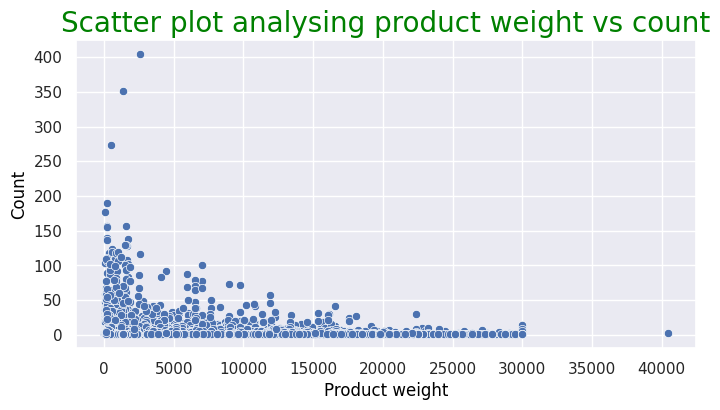

In [ ]:
# Scatter plot analysing product weight vs count - the products which were sold in the highest amount were light and weighted between below 12500
# The heavier the product is, the smaller amount of it was sold
plt.figure(figsize= [8,4])
sns.scatterplot(data=group_product_id, x='product_weight', y='count')
plt.title("Scatter plot analysing product weight vs count", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Product weight", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

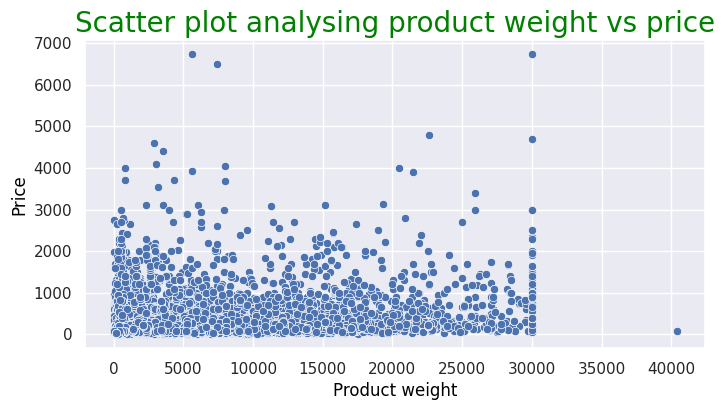

In [ ]:
# Scatter plot analysing product weight vs price - there are products which are heavy and expensive and light which are expensive
# There is one outlier that weighs above 40000 and is very cheap
# There is no rule saying that heavier products are more expensive
plt.figure(figsize= [8,4])
sns.scatterplot(data=group_product_id, x='product_weight', y='price')
plt.title("Scatter plot analysing product weight vs price", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Product weight", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Price", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

# **Question 5**

## What is the segmentation of sellers and products?

In [ ]:
# Create new table with relevant data for the question
q5 = df[['product_id', 'seller_id']]
q5.head()

,product_id,seller_id
0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202
1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36
2,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d
3,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4
4,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87


In [ ]:
p = df[['product_id']]
s = df[['seller_id']]

In [ ]:
# Group by product_id and seller_id
group_p = p.groupby([p['product_id']]).agg(count=('product_id', 'count')).reset_index()
group_s = s.groupby([s['seller_id']]).agg(count=('seller_id', 'count')).reset_index()

In [ ]:
# Get first rows
group_p.head()

,product_id,count
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,2
4,000d9be29b5207b54e86aa1b1ac54872,1


In [ ]:
# Get first rows
group_s.head()

,seller_id,count
0,0015a82c2db000af6aaaf3ae2ecb0532,3
1,001cca7ae9ae17fb1caed9dfb1094831,239
2,001e6ad469a905060d959994f1b41e4f,1
3,002100f778ceb8431b7a1020ff7ab48f,55
4,004c9cd9d87a3c30c522c48c4fc07416,158


In [ ]:
# Get the mean of count
mean_p = group_p['count'].mean()
mean_s = group_s['count'].mean()
mean_p, mean_s

(3.4343428094162776, 36.60468183316848)

In [ ]:
# Based on above: 1 seller has sold on average more than 36 products and 1 product has been sold more than 3 times

# Assume 3 segments for sellers:
# - weak with less than 20 products sold
# - medium with less tan 50 products sold
# - good with above 50 products sold

# Assume 3 segments for products:
# - weak which were sold less than 2 times
# - medium which were sold less than 6 times
# - good which  were sold more than 6 times

In [ ]:
# Apply above conditions
group_s.loc[group_s['count'] < 20, 'segment'] = 'weak'
group_s.loc[(group_s['count'] >= 20) & (group_s['count'] < 50), 'segment'] = 'medium'
group_s.loc[group_s['count'] >= 50, 'segment'] = 'good'

group_p.loc[group_p['count'] < 2, 'segment'] = 'weak'
group_p.loc[(group_p['count'] >= 2) & (group_p['count'] < 6), 'segment'] = 'medium'
group_p.loc[group_p['count'] >= 6, 'segment'] = 'good'

In [ ]:
# Check first rows for sellers
group_s.head()

,seller_id,count,segment
0,0015a82c2db000af6aaaf3ae2ecb0532,3,weak
1,001cca7ae9ae17fb1caed9dfb1094831,239,good
2,001e6ad469a905060d959994f1b41e4f,1,weak
3,002100f778ceb8431b7a1020ff7ab48f,55,good
4,004c9cd9d87a3c30c522c48c4fc07416,158,good


In [ ]:
# Check first rows for products
group_p.head()

,product_id,count,segment
0,00066f42aeeb9f3007548bb9d3f33c38,1,weak
1,00088930e925c41fd95ebfe695fd2655,1,weak
2,0009406fd7479715e4bef61dd91f2462,1,weak
3,000b8f95fcb9e0096488278317764d19,2,medium
4,000d9be29b5207b54e86aa1b1ac54872,1,weak


In [ ]:
# Count the occurences for each segment for sellers
s = pd.DataFrame(group_s['segment'].value_counts()).reset_index()
s

,segment,count
0,weak,2154
1,good,464
2,medium,415


In [ ]:
# Count the occurences for each segment for products
p = pd.DataFrame(group_p['segment'].value_counts()).reset_index()
p

,segment,count
0,weak,17730
1,medium,10794
2,good,3803


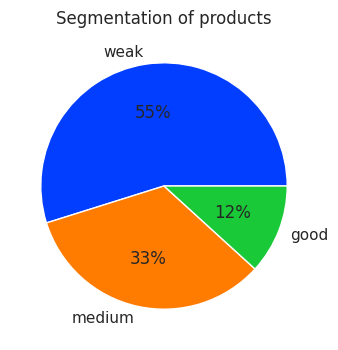

In [ ]:
# Pie chart for product's segmentation - the most amount of products are sold weakly
palette_color = sns.color_palette('bright')
plt.pie(p['count'], labels=p['segment'], colors=palette_color, autopct='%.0f%%')
plt.title('Segmentation of products')
plt.show()

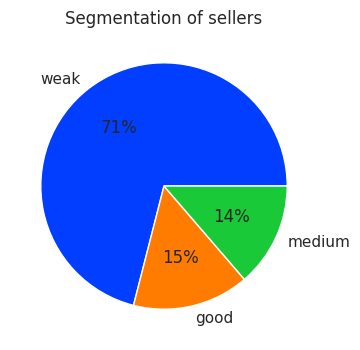

In [ ]:
# Pie chart for seller's segmentation - the most amount of sellers sold weakly
palette_color = sns.color_palette('bright')
plt.pie(s['count'], labels=s['segment'], colors=palette_color, autopct='%.0f%%')
plt.title('Segmentation of sellers')
plt.show()